In [1]:
from IPython.display import display, HTML
import re
import json

def show_result(loaded_json):
    for y in loaded_json:
        #y = json.loads(y)
        if y['find_success'] == False:
            print('====dont know that word TT')
            continue

        for filename in y['memes']:
            decoded = y['memes'][filename].replace("'", '"')
            decoded = re.search(r'\"(.*)\"', decoded).group(1)
            display(HTML('''<img src="data:image/jpg;base64,''' + decoded + '''">'''))    
            print(y['episodes'][filename])                
            print(y['texts'][filename])
            if y['sims']:
                print(y['sims'][filename])
        print("--- done ---")

In [8]:
import client
mc = client.MgClient()

==query==



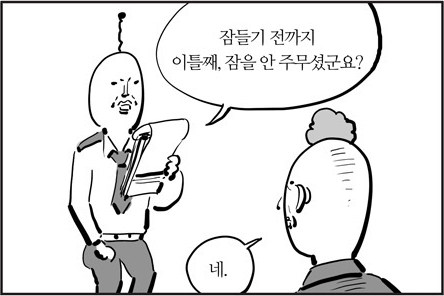

94화_잠은행上
잠들기 전까지 이틀째 잠을 안 주무셨군요 네 
0.6738407611846924



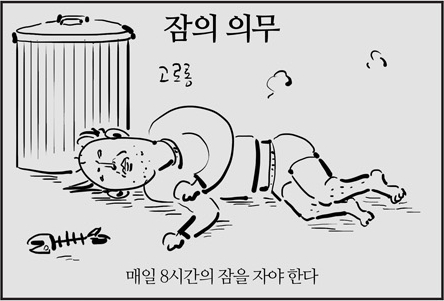

94화_잠은행上
자의 의무 매일 시간의 잠을 자야 한다 
0.3297901749610901
--- done ---
==random==



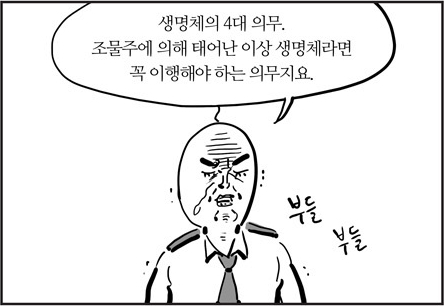

94화_잠은행上
생명체의 대 의무 조물주에 의해 태어난 이상생명체라면 꼭 이행해야 하는 의무지요 
--- done ---


In [42]:
print('==query==')
query = '잠을 안 주무셨군요?'
show_result(mc.dank([query], 3))
print('==random==')
show_result(mc.random())